# Regularización

Consideremos un modelo de regresión lineal: 

$$Y_i = w_0 + w_1 \ X_{1,i} +w_2 \ X_{2,i} + ... + w_p \ X_{p,i} + u_i, $$

donde $\mathbf{X} = (X_1,X_2,...,X_p)$ es un vector aleatorio de $p$ dimensiones, del cual $i \in \{1,...,n\}$ es la i-ésima muestra. 

Como sabemos, una manera de encontar los parámetros $w_0, w_1,...,w_p$ es mediante la minimización de los cuadrados de los errores en la predicción. Esto se puede expresar como una función de costo:

$$\mathcal{L}_{OLS}(w_0,w_1,...,w_p;\mathbf{X},Y)= \sum_{i=1}^n (y_i-\hat{y}_i)^2 = (y_i - \sum_{k=0}^p w_k x_{k,i})^2,\ \text{con}\ x_{0,i}=1.$$

En algunos casos, los parámetros encontrados pueden producir modelos que no representan adecuadamente la distribución de los datos, como se muestra en la imagen de abajo:

<img src="images/fitting_variance.png" width=500>

La regresión se ajustó utilizando únicamente los datos en rojo (entrenamiento), mientras que la distribución de datos también incluye los datos en verde (prueba). Aunque hay poco sesgo en la estimación con los datos de entrenamiento, también existe un gran varianza en las predicciones con los datos de entrenamiento. En este caso, la pendiente de la recta es más grande de lo que debería ser. Por tanto, se dice que hay un caso de "overfitting".

En general, la idea de la regularización es "restringir" los parámetros para que tomen un cierto rango de valores aceptables. De esta forma se puede obtener una regresión que mejor reproduzca la distribución de los datos.


<img src="images/ridge_fit.png" width=500>

**Nota:** A sí mismo, el introducir una restricción adicional permite que exista una solución bien definida cuando p>n.

Hay varias formas de imponer la restricción. Aquí veremos los casos de Regularización LASSO y Ridge.

# Ridge

Queremos restringir a los coeficientes de la regresión lineal (no lincluye $w_0$) de modo que estos no sean muy grandes. Esto lo hacemos introduciendo una "penalización" por el cuadrado del valor de los parámetros. Esta se puede expresar como la siguiente función de costo:

$$\mathcal{L}_{Ridge}(w_1,...,w_p;\lambda)= \lambda (w_1^2+...+w_p^2).$$


Por lo tanto, se contruye la función de costo a minimizar como:

$$\mathcal{L}_{OLS}(w_0,w_1,...,w_p;\mathbf{X},Y) + \mathcal{L}_{Ridge}(w_1,...,w_p;\lambda)$$

**Obs.**

- $\lambda$ debe tomar valores no negativos. 
- Si $\lambda=0$ se obtiene el caso de OLS clásico. 
- Conforme $\lambda$ crece los valores de $w_1,...,w_p$ tienden a cero.
- Los cuadrados en la función $\mathcal{L}_{Ridge}$ penalizan más valores grandes (mayores a uno) que valores pequeños (menores a uno). Por tanto, los valores de los coeficientes no decaen tan rápido a cero, i.e. es más difícil eliminar los coeficientes. Esto lo hace útil para datos en los que sabemos que todos los coeficientes tendrán alguna relevancia (dense data).
- El valor adecuado de $\lambda$ se debe elejir mediante un proceso de validación de modo que se obtenga el mejor resultado en los datos de prueba. Una forma de hacer esto es mediante validación cruzada.


# Least Absolute Shrinkage and Selection Operator (LASSO)

Este caso es análogo al anterior. La única diferencia es que la "penalización" utilizada es el valor absoluto de los parámetros. Se expresa como:

$$\mathcal{L}_{LASSO}(w_1,...,w_p;\lambda)= \lambda (|w_1|+...+|w_p|).$$

y la función resultante de costo a minimizar es:

$$\mathcal{L}_{OLS}(w_0,w_1,...,w_p;\mathbf{X},Y) + \mathcal{L}_{LASSO}(w_1,...,w_p;\lambda)$$

**Obs.**

- $\lambda$ debe tomar valores no negativos. 
- Si $\lambda=0$ se obtiene el caso de OLS clásico. 
- Conforme $\lambda$ crece los valores de $w_1,...,w_p$ tienden a cero.
- Los valores absolutos en la función $\mathcal{L}_{LASSO}$ penalizan de manera proporcional valores grandes (mayores a uno) y pequeños (menores a uno). Por tanto, los valores de los coeficientes decaen más rápido a cero y se pueden eliminar términos más fácilmente. Esto lo hace ideal para casos en los que sabemos que algunos coeficientes son irrelevantes para la regresión (sparse data).
- El valor adecuado de $\lambda$ se debe elejir mediante un proceso de validación de modo que se obtenga el mejor resultado en los datos de prueba. Una forma de hacer esto es mediante validación cruzada.

Gráficamente, la diferencia en el comportamiento de ambas regularizaciones se puede ilustrar en la siguiente gráfica.

<img src="https://cdn-images-1.medium.com/max/1200/1*Jd03Hyt2bpEv1r7UijLlpg.png">

# Elastic Net

¿Qué pasa en el caso en el que no sabemos cuál es el comportamiento de los datos? En el caso general en el que tenemos una combinación de datos dispersos (sparse) y densos, por lo que no sabemos qué variables serán relevantes y no podríamos discriminar entre un caso y otro. La solución a esto, como lo implementa Elastic Net, es utilizar una combinación de LASSO y Ridge. Lo hace introduciendo la siguiente función de costo:

$$\mathcal{L}_{E\ Net}(w_1,...,w_p;\lambda_1,\lambda_2)= \mathcal{L}_{LASSO}(w_1,...,w_p;\lambda_1) + \mathcal{L}_{Ridge}(w_1,...,w_p;\lambda_2).$$


y la función resultante de costo a minimizar es:

$$\mathcal{L}_{OLS}(w_0,w_1,...,w_p;\mathbf{X},Y) + \mathcal{L}_{E\ Net}(w_1,...,w_p;\lambda_1,\lambda_2).$$


**Obs.**

- Cuando $\lambda_1=0$ y  $\lambda_2=0$ se obitne el caso de OLS clásico.
- Cuando $\lambda_1=0$ y $\lambda_2\neq0$ se obitene regularización LASSO.
- Cuando $\lambda_1\neq0$ y $\lambda_2=0$ se obtiene regularización Ridge.
- Este modelo híbrido es bueno para utilizar en casos generales, pues reduce penaliza valores grandes de los parámetros y puede quitar más fácilmente los coeficientes que no son muy relevantes. 
- Los valores de $\lambda_1$ y $\lambda_2$ se deben obtener mediante un proceso de validación, buscando en una malla de posibles valores como se muestra en la imagen.

<img src="images/lambda_grid_search.png" width=500>

# Validación Cruzada

Una vez que termina el entrenamiento de un algoritmo con un conjunto específico de datos ($X_{train}$), deseamos obtener una evaluación de cómo se comportarán las predicciones con datos nuevos ($X_{test}$). Hay varios resultados posibles:

1. El error de entrenamiento es grande: En este caso el modelo no puede reproducir el comportamiento de los datos que ve (underfitting)
2. El error de entrenamiento es muy pequeño comparado con el de prueba: El modelo no se puede generalizar a datos nuevos ya que se le dió mucho peso a los datos de entrenamiento (overfitting).
3. El error de entrenamiento y el de prueba son similares: En este caso se puede decir que el proceso de entrenamiento fue exitoso.

**Nota:** El error de entrenamiento generalemente será menor al de prueba. 

En general, deseamos que los modelos puedan tener el mejor rendimiento posible con datos que no han "visto" previamente. En la práctica, se tiene una base de datos de cierto tamaño y esta se separa en 2 partes: $X_{train}$ y $X_{test}$ para entrenar y evaluar el modelo. Sin embargo, la manera en la que se hace esta separación puede introducir algún tipo de sego en los modelos resultantes.  La validación cruzada es una técnica que se utiliza para verificar qué tanto afecta en el modelo la elección de datos para entrenamiento y prueba.


<img src="https://upload.wikimedia.org/wikipedia/commons/1/1c/K-fold_cross_validation_EN.jpg">

La validación cruzada consiste en:
- Partir la base de datos en $k$ subconjuntos de igual tamaño (si es posible).
- Un subconjunto será $X_{test}$ y el resto se combinará para ser $X_{train}$.
- Repetir el proceso entrenamiento-prueba cambiando la partición seleccionada para prueba.
- Promediar las predicciones de cada una de las corridas

En sci-kit learn hay varias funciones que implementan este método de validación: `GridSearchCV`, `cross_val_score` y `cross_val_predict`.

# Implementación

Procedamos a implementar estos algoritmos. Comenzamos por importar las librerías usuales.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

En esta ocasión trabajaremos con una base de datos que relaciona el gasto hecho en publicidad en radio, TV y periódico con las ventas de un cierto producto.

In [4]:
file_path = 'Advertising.csv'

data = pd.read_csv(file_path)
print(data.shape)

data.head()

(200, 5)


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Quitaremos la primera columna que es sólo un índice de numeración. Se puede hacer de varias formas:

In [10]:
data.iloc[:,1:].head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
data.drop(['Unnamed: 0'], axis=1, inplace=False).head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
data.drop(['Unnamed: 0'], axis=1, inplace=True) #inplace indica si se modifica la variable original

In [12]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [16]:
data.columns[:-1]

Index(['TV', 'radio', 'newspaper'], dtype='object')

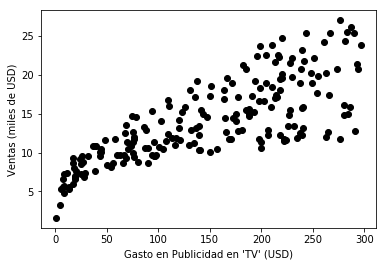

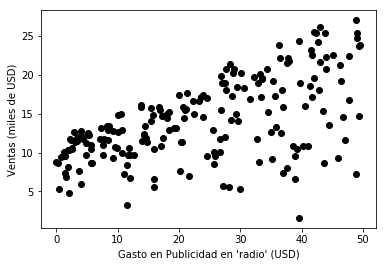

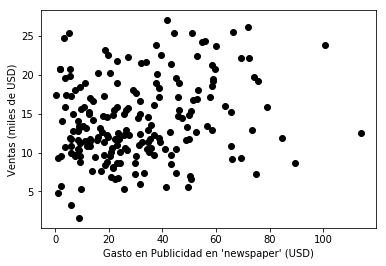

In [56]:
for column in data.columns[:-1]:

    marketing=data[column]
    sales=data['sales']
    
    plt.scatter(marketing,sales,c='black')
    plt.xlabel("Gasto en Publicidad en '{}' (USD)".format(column))
    plt.ylabel("Ventas (miles de USD)")
    plt.show()

### Regresión con OLS

Usaremos la función `LinearRegression` para los siguientes ejercicios, donde también aplicaremos validación cruzada.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [78]:
? LinearRegression

In [42]:
? cross_val_score

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict

X = data.drop(['sales'], axis=1)
y = data['sales'].values.reshape(-1,1)

lin_reg = LinearRegression()

MSEs = cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=5) # siempre buscaremos maximizar el 'score'

print(MSEs)

mean_MSE = np.mean(MSEs)

print(mean_MSE)

[-3.1365399  -2.42566776 -1.58522508 -5.42615506 -2.79114519]
-3.07294659710021


Podemos hacer predicciones con validación cruzada, donde cada predicción para un valor $x_i$ se hace sólo cuando éste está en $X_{test}$.

In [77]:
cross_val_predict(lin_reg,X,y, cv=5)

array([[20.7540982 ],
       [12.43772205],
       [12.51341689],
       [17.76870412],
       [13.38086151],
       [12.70793666],
       [11.73444816],
       [12.08637541],
       [ 3.64203447],
       [12.57693301],
       [ 7.05791249],
       [17.21923958],
       [10.77441706],
       [ 8.77464996],
       [18.55724711],
       [20.9642119 ],
       [13.24778773],
       [23.39640754],
       [ 9.94096091],
       [14.16420425],
       [18.26263874],
       [14.77924986],
       [ 6.62165738],
       [16.58898194],
       [ 8.14009286],
       [15.63351777],
       [14.9536351 ],
       [17.08059756],
       [19.43377214],
       [ 9.24087835],
       [21.75491852],
       [11.43577201],
       [ 7.69704515],
       [18.78840097],
       [ 7.52781685],
       [16.98135919],
       [23.33713956],
       [15.72263036],
       [ 9.96978732],
       [20.50460709],
       [16.25895556],
       [17.20427625],
       [21.34322188],
       [13.83781472],
       [ 8.90820012],
       [15

### Regularización con Ridge

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [44]:
? GridSearchCV

In [35]:
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30]

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [32]:
ridge_regressor.best_params_

{'alpha': 20}

In [33]:
ridge_regressor.best_score_

-3.0726713383411433

### Regularización con LASSO

In [24]:
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

lasso_regressor.fit(X, y)

/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [25]:
lasso_regressor.best_params_

{'alpha': 1}

In [26]:
lasso_regressor.best_score_

-3.0414058967513684

### Elastic Net

La implementación de Elastic Net en Sci-Kit Learn no utiliza como parámetros $\lambda_1$ y $\lambda_2$. En vez de eso, utiliza parámetros equivalentes:

- $\alpha=\lambda_1 + \lambda_2$
- $\text{L1_Ratio} = \frac{\lambda_1}{\lambda_1 + \lambda_2}$

Por default $\text{L1_Ratio}=0.5$

In [48]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20],'l1_ratio':[0.1,0.25,0.5,0.75,0.9]}

enet_regressor = GridSearchCV(enet, parameters, scoring='neg_mean_squared_error', cv = 5)

enet_regressor.fit(X, y)

/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20], 'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [46]:
enet_regressor.best_params_

{'alpha': 5, 'l1_ratio': 0.25}

In [47]:
enet_regressor.best_score_

-3.0416926149490924

Comparamos los resultados de las regresiones.

In [50]:
print("NMSE OLS:",mean_MSE)
print("NMSE Ridge:",ridge_regressor.best_score_)
print("NMSE LASSO:", lasso_regressor.best_score_)
print("NMSE Elastic Net:", enet_regressor.best_score_)

NMSE OLS: -3.07294659710021
NMSE Ridge: -3.0726713383411433
NMSE LASSO: -3.0414058967513684
NMSE Elastic Net: -3.0416926149490924


Podemos ver los parámetros de los modelos:

In [83]:
best_ridge=ridge_regressor.best_estimator_
best_lasso=lasso_regressor.best_estimator_
best_enet=enet_regressor.best_estimator_

print("Ridge Parameters:",best_ridge.intercept_, best_ridge.coef_)
print("LASSO Parameters:",best_lasso.intercept_, best_lasso.coef_)
print("Elastic Net Parameters:",best_enet.intercept_, best_enet.coef_)

Ridge Parameters: [2.94045051] [[ 0.04576461  0.18843167 -0.00101353]]
LASSO Parameters: [3.04021558] [0.04566142 0.1834644  0.        ]
Elastic Net Parameters: [3.14050022] [0.04564379 0.17926508 0.        ]


Ahora grafiquemos los resultados para compararlos. Para esto, generaremos modelos con los valores óptimos encontrados en cada caso.

In [60]:
X.describe()

,TV,radio,newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


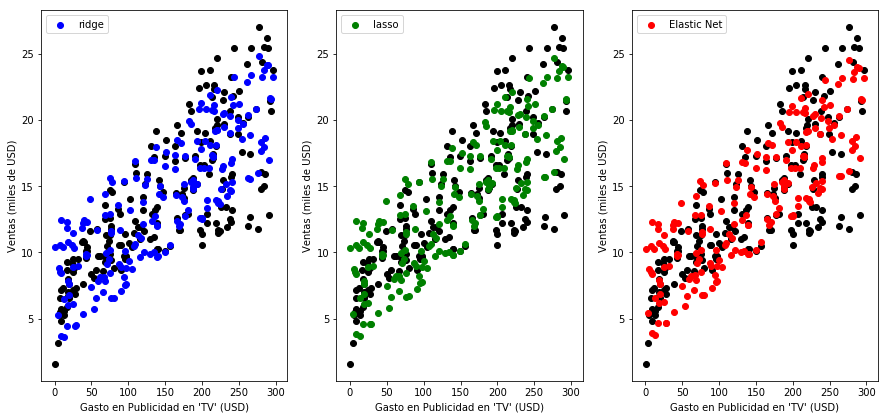

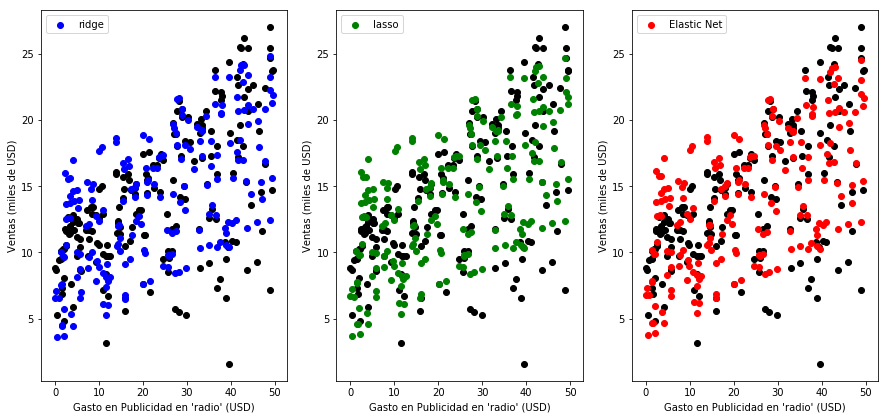

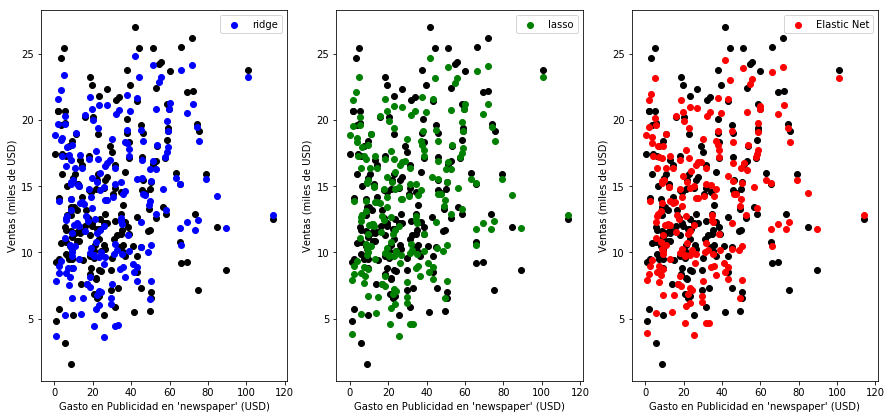

In [102]:
y_ridge=best_ridge.predict(X)
y_lasso=best_lasso.predict(X)
y_enet=best_enet.predict(X)

for column in data.columns[:-1]:
    
    marketing=data[column]
    sales=data['sales']
    
    fig=plt.figure(figsize=(15,15))
    
    ax1=plt.subplot(2, 3, 1)
    
    ax1.scatter(marketing,sales,c='black',label=None)
    ax1.scatter(marketing, y_ridge,c='blue',label='ridge')
    ax1.set_xlabel("Gasto en Publicidad en '{}' (USD)".format(column))
    ax1.set_ylabel("Ventas (miles de USD)")
    plt.legend()
    
    ax2=plt.subplot(2, 3, 2)
    
    ax2.scatter(marketing,sales,c='black',label=None)
    ax2.scatter(marketing, y_lasso,c='green',label='lasso')
    ax2.set_xlabel("Gasto en Publicidad en '{}' (USD)".format(column))
    ax2.set_ylabel("Ventas (miles de USD)")
    plt.legend()
    
    ax3=plt.subplot(2, 3, 3)
    
    ax3.scatter(marketing,sales,c='black',label=None)
    ax3.scatter(marketing, y_enet,c='red',label='Elastic Net')
    ax3.set_xlabel("Gasto en Publicidad en '{}' (USD)".format(column))
    ax3.set_ylabel("Ventas (miles de USD)")
    plt.legend()
    
    plt.show()

# Referencias: 

- [Ridge and Lasso Regression: A Complete Guide with Python Scikit-Learn](https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b)
- [A  LAVA  Attack  on the  Recovery  OF  Sums  of  Dense and Sparse  Signals](https://arxiv.org/pdf/1502.03155.pdf)
- [How to Perform Lasso and Ridge Regression in Python](https://towardsdatascience.com/how-to-perform-lasso-and-ridge-regression-in-python-3b3b75541ad8)
- [Regularization Part 1: Ridge Regression](https://www.youtube.com/watch?v=Q81RR3yKn30)